In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

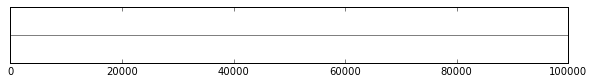

In [36]:
import numpy as np

X = np.arange(100000)

plt.figure(figsize=(10, 1))
plt.axis([0, len(X), -1, 1])
plt.axes().get_yaxis().set_visible(False)
plt.axhline(0, color='gray')
# plt.plot(X, np.zeros_like(X), '|')
plt.show()